In [3]:
import torch as t 
import lenet
import numpy as np
import lenet
import cv2
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

### 定点化转换函数

In [ ]:
def myTrans(inti):
    str = hex(int(inti) & 0xffff)[2:]
    lens = len(str)
    strnew = "0" * (4 - lens) + str        
    return strnew
def tensorTrans(tensor):
    shape = tensor.shape
    shapelen = len(shape)
    tempTensor = []
    if shapelen == 3:
        
        for i in range(shape[0]):
            temp1 = []
            for j in range(shape[1]):
                temp2 = []
                for k in range(shape[2]):
                    temp2.append(myTrans(tensor[i,j,k]))
                temp1.append(temp2)
            tempTensor.append(temp1)
            
    elif shapelen == 4:
        for i in range(shape[0]):
            temp1 = []
            for j in range(shape[1]):
                temp2 = []
                for k in range(shape[2]):
                    temp3 = []
                    for m in range(shape[3]):
                        temp3.append(myTrans(tensor[i,j,k,m]))
                    temp2.append(temp3)
                temp1.append(temp2)
            tempTensor.append(temp1)
    elif shapelen == 1:
        for i in range(shape[0]):
            tempTensor.append(myTrans(tensor[i]))
    elif shapelen == 2:
        for i in range(shape[0]):
            temp1 = []
            for j in range(shape[1]):
                temp1.append(myTrans(tensor[i,j]))
            tempTensor.append(temp1)
    else:
        print(shapelen)
    return tempTensor
    

### 参数定点化

In [ ]:
state_dict = t.load("/Users/lizian/Desktop/en/LeNet-5/net.pth")

INT_state_dict = {}
for i in state_dict:
    INT_state_dict[i] = (state_dict[i] * pow(2, 8)).int()
    
hex_state_dict = {}
for i in INT_state_dict:
    hex_state_dict[i] = tensorTrans(INT_state_dict[i])
    
for i in range(10):
    with open("/Users/lizian/Desktop/en/LeNet-5/params/" + str(keys[i]) + ".txt", "w") as f:
        shape = np.array(hex_state_dict[keys[i]]).shape
        lens = len(shape)
        if(lens == 4):
            if(shape[0] == 120) :
                for num in range(shape[0]):
                    for num2 in range(shape[1]):
                        for row in range(shape[2]):
                            for col in range(shape[3]):
                                
                                f.write(hex_state_dict[keys[i]][num][num2][row][col] + ' ')
                        
                        f.write('\n')

            else:
                for num in range(shape[0]):
                    for num2 in range(shape[1]):
                        for row in range(shape[2]):
                            for col in range(shape[3]):
                                f.write(hex_state_dict[keys[i]][num][num2][row][col] + ' ')
                                f.write('\n')
                        
        elif(lens == 2):
            for num in range(shape[0]):
            
                if shape[1] == 84:
                    for num2 in range(shape[1] + 12):
                        if num2 < shape[1]:
                            f.write(hex_state_dict[keys[i]][num][num2] + '\n')
                        else:
                            f.write('0000' + '\n')
                if shape[1] == 120:
                    for num2 in range(shape[1] + 8):
                        if num2 < shape[1]:
                            f.write(hex_state_dict[keys[i]][num][num2] + '\n')
                        else:
                            f.write('0000' + '\n')


        elif(lens == 1):
            for num in range(shape[0]):
                f.write(hex_state_dict[keys[i]][num] + ' ')
                
        else:

            print("error")


### 图片预处理

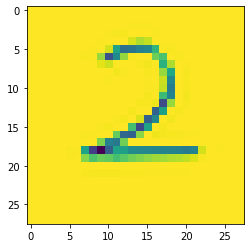

In [7]:
def imagePrepare(pic_path):
    img = cv2.imread(pic_path, 1)
    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    # 把opencv图像转化为PIL图像
    im = Image.fromarray(cv2.cvtColor(th1,cv2.COLOR_BGR2RGB))
    # 灰度化
    im = im.convert('L')
    # 为图片重新指定尺寸
    im = im.resize((28,28), Image.ANTIALIAS)
    plt.imshow(im)
    plt.show()
    # 图像转换为list
    im_list = list(im.getdata())
    # 图像灰度反转
    result = [(255-x)*1.0/255.0 for x in im_list]
    return result
path0 = "/Users/lizian/Desktop/en/LeNet-5/pic/"
pic_path = path0 + '12' + '.png'
pic = imagePrepare(pic_path)


### 图片定点化

In [ ]:
for i in range(20):
    pic_path = path0 + str(i) + '.png'
    pic = imagePrepare(pic_path)
    with open('./params/pic.txt', 'a') as f:
        for j in range(784):
            f.write(myTrans(int(pic[j]*pow(2,8))) + ',\n')